In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../Data/HospitalityEmployees.csv')

In [3]:
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [4]:
df.columns=['ds', 'y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.tail()

,ds,y
343,2018-08-01,2019.1
344,2018-09-01,1992.5
345,2018-10-01,1984.3
346,2018-11-01,1990.1
347,2018-12-01,2000.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
 1   y       348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


# EDA

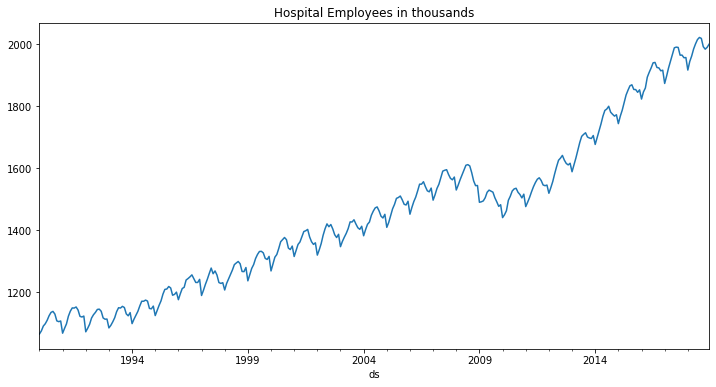

In [8]:
title = 'Hospital Employees in thousands'
df.set_index('ds')['y'].plot(title=title);

# Train test Split

In [9]:
train = df.iloc[:-12]
test = df.iloc[-12:]

# Model

In [10]:
for i in ['additive', 'multiplicative']:
    model = Prophet(seasonality_mode=i).fit(train)
    future = model.make_future_dataframe(12,freq='MS')
    forecast = model.predict(future)
    from statsmodels.tools.eval_measures import rmse
    print('RMSE ' + i + ' :{}'.format(rmse(test['y'], forecast.iloc[-12:]['yhat'])) )     

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE additive :52.763115098794984
RMSE multiplicative :53.30540959394743


In [11]:
model = Prophet(seasonality_mode='additive').fit(train)
future = model.make_future_dataframe(12,freq='MS')
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


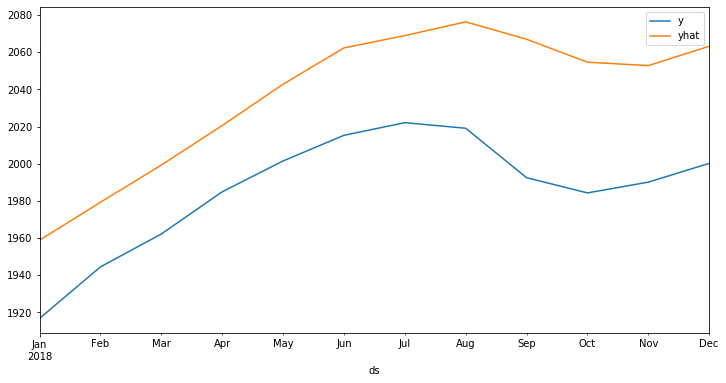

In [12]:
test.join(forecast.iloc[-12:]['yhat']).set_index('ds').plot();